In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Set plotting style
plt.style.use("seaborn-white")

WIDTH = 12
HEIGHT = 9

prop_cycle = plt.rcParams['axes.prop_cycle']
DEFAULT_COLORS = prop_cycle.by_key()['color']

%matplotlib inline

# Helper functions

In [4]:
def number_formatter(number, pos=None):
    """Convert a number into a human readable format.
    
    Via https://flynn.gg/blog/better-matplotlib-charts/"""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000.0
    return "€%.0f %s" % (number, ["", "K", "M", "B", "T", "Q"][magnitude])

In [5]:
def draw_bands(ax, ticks=None):
    """Add grey bands to the plot.

    Args:
        ax: a matplotlib axes object.
        ticks: a list of tick postions, to use instead of the ones that come
            with ax.
    """
    if ticks is None:
        ticks = ax.get_xticks(minor=False)

    for i in range(0, len(ticks), 2):
        # Check for the end of the array
        if i >= len(ticks) or i + 1 >= len(ticks):
            return

        # Draw a band
        left_tick = ticks[i]
        right_tick = ticks[i + 1]
        plt.axvspan(left_tick, right_tick, color="0.97", zorder=-2)

In [6]:
def draw_legend(plt):
    """Draw the legend on the specified plot.

    Args:
        plt (matplotlib.pyplot): pyplot object
    """
    leg = plt.legend(
        loc="upper left",
        fontsize=24,
        ncol=1,
        frameon=1,
        fancybox=True,
        # The bellow commands remove the lines in the legend
        handlelength=0,
        handletextpad=0,
        markerscale=0,
    )

    # Turn on and theme the frame
    frame = leg.get_frame()
    frame.set_linewidth(1.2)
    frame.set_alpha(1)
    frame.set_facecolor("white")
    frame.set_edgecolor("black")

    # Set the legend text color to match the line color
    lines = leg.get_lines()
    texts = leg.get_texts()
    for line, text in zip(lines, texts):
        text.set_color(line.get_color())

# Load the data

In [7]:
df = pd.read_json("./data/tdf_prizes_dataframe.json", orient="table")

In [8]:
x = df.index
y_tot = df["total_adjusted_euro"]
y_first = df["first_prize_adjusted_euro"]

# Make the plot

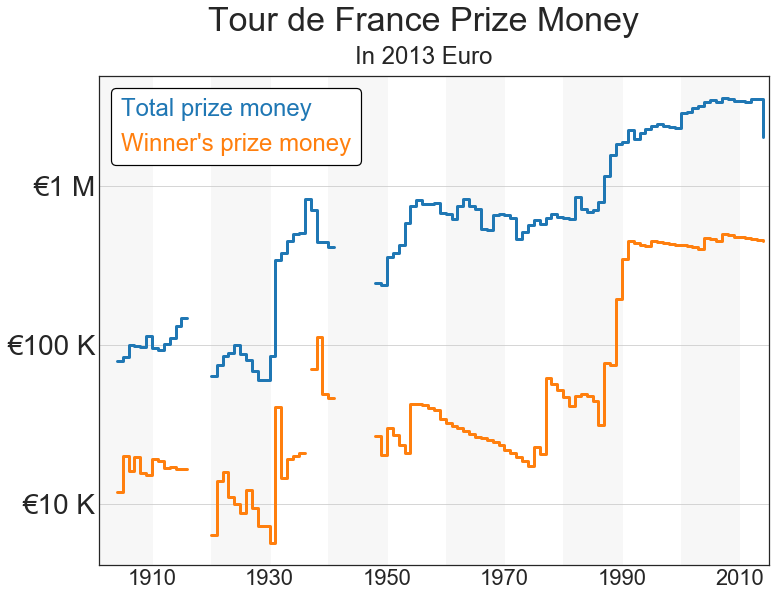

In [9]:
fig, ax = plt.subplots(figsize=(WIDTH, HEIGHT))

# Plot the data
LINEWIDTH = 3
STEP_WHERE = "post"
plt.step(x, y_tot, where=STEP_WHERE, linewidth=LINEWIDTH, label="Total prize money")
plt.step(x, y_first, where=STEP_WHERE, linewidth=LINEWIDTH, label="Winner's prize money")

plt.yscale("log")

# Set titles
plt.figtext(0.5, 0.95, "Tour de France Prize Money", fontsize=34, ha="center")
plt.figtext(0.5, 0.9, "In 2013 Euro", fontsize=24, ha="center")
ax.set_ylabel(None)
ax.set_xlabel(None)

ax.set_xlim("1901", "2015")

ax.tick_params(axis="y", which="major", labelsize=28)
ax.tick_params(axis="x", which="major", labelsize=22)
ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))
ax.yaxis.grid()  # horizontal lines

plt.xticks(ticks=[str(yr) for yr in range(1910, 2020, 20)])
draw_bands(ax, [str(yr) for yr in range(1900, 2020, 10)])

draw_legend(plt)

# Save to disk
for ext in ("png", "svg"):
    fig.savefig(
        "/tmp/tdf_prize_money_in_2013_euro.{ext}".format(ext=ext), bbox_inches="tight"
    )